In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Dot

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1-KniHyhaYfYnJUKcgPa2NjfxRmwviWAP"})   # train 
downloaded.GetContentFile('train') 
downloaded = drive.CreateFile({'id':"1-DrxL3k_Mpv2UkSDNcT7kcfU-Pgzou-Z"})   # valid
downloaded.GetContentFile('valid') 
downloaded = drive.CreateFile({'id':"1-5KBgmLF3b3KZeg75PBSnAeIIWi0pbI8"})   # test
downloaded.GetContentFile('test') 

In [4]:
train = pd.read_parquet("train")
valid = pd.read_parquet("valid")
test = pd.read_parquet("test")

In [5]:
x_train = train.drop(["popular"], axis=1)
y_train = train["popular"].apply(lambda x: 1 if x else 0)

x_valid = valid.drop(["popular"], axis=1)
y_valid = valid["popular"].apply(lambda x: 1 if x else 0)

x_test = test.drop(["popular"], axis=1)
y_test = test["popular"].apply(lambda x: 1 if x else 0)

In [6]:
len(x_train.columns)

65

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

In [10]:
x_train[0]

array([ 0.86200923, -0.4932975 ,  0.60693828, -0.07658126,  0.53452528,
       -0.65486579, -0.5227811 , -0.43216053, -0.30104466, -0.0626614 ,
       -1.1961239 , -0.24604058,  2.18175394, -0.44700457, -0.26641266,
       -0.49498043, -0.47946009, -0.42743828, -0.29147352, -0.50644825,
       -0.2175054 , -3.13336722, -1.81168502, -0.94998138, -0.89110362,
       -2.3382258 , -0.17587142, -0.24115481, -0.24362454,  2.24391702,
       -0.47768992, -0.48353508, -0.47685343, -0.40871564, -0.25551537,
       -0.27292756, -0.38760127,  1.13663674,  1.08264433, -0.59676708,
       -0.61056945, -0.68512634,  0.67008855, -0.33192731,  0.27615266,
       -0.28933222,  0.41744595, -0.37143691,  0.18333606,  0.03408987,
       -0.30745033, -0.70792839, -0.27694436, -0.94158838,  0.67856096,
       -0.98951965, -1.8084995 ,  0.141463  , -0.1932973 , -0.68150548,
       -0.44743935, -0.25021511, -0.36218925,  0.66962354,  0.18637855])

In [11]:
model = Sequential([Input((65,)), 
                   Dense(64, activation='relu'),
                   Dropout(0.2),
                   Dense(64, activation='relu'),
                   Dropout(0.2),
                   Dense(7, activation='relu'),
                   Dropout(0.2),
                   Dense(7, activation='relu'),
                   Dropout(0.2),
                   Dense(1, activation='sigmoid')]
                   )

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4224      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
 dropout_2 (Dropout)         (None, 7)                 0         
                                                                 
 dense_3 (Dense)             (None, 7)                 5

In [13]:
model.compile(loss='binary_crossentropy',metrics='AUC', optimizer="adam")

In [14]:
hst = model.fit(x_train, y_train, validation_split=0.1, batch_size=128, epochs=25)

Epoch 1/25
226/226 [==============================] - 2s 4ms/step - loss: 0.5829 - auc: 0.5335 - val_loss: 0.4596 - val_auc: 0.6890
Epoch 2/25
226/226 [==============================] - 1s 3ms/step - loss: 0.5167 - auc: 0.5912 - val_loss: 0.4428 - val_auc: 0.7045
Epoch 3/25
226/226 [==============================] - 1s 3ms/step - loss: 0.4994 - auc: 0.6202 - val_loss: 0.4456 - val_auc: 0.7034
Epoch 4/25
226/226 [==============================] - 1s 3ms/step - loss: 0.4931 - auc: 0.6359 - val_loss: 0.4397 - val_auc: 0.7068
Epoch 5/25
226/226 [==============================] - 1s 3ms/step - loss: 0.4890 - auc: 0.6500 - val_loss: 0.4363 - val_auc: 0.7109
Epoch 6/25
226/226 [==============================] - 1s 3ms/step - loss: 0.4853 - auc: 0.6593 - val_loss: 0.4378 - val_auc: 0.7100
Epoch 7/25
226/226 [==============================] - 1s 3ms/step - loss: 0.4826 - auc: 0.6668 - val_loss: 0.4363 - val_auc: 0.7128
Epoch 8/25
226/226 [==============================] - 1s 3ms/step - loss: 0.

In [15]:
roc_auc_score(y_valid, model.predict(x_valid))

0.714701394083645

In [16]:
roc_auc_score(y_test, model.predict(x_test))

0.7105625230394246

In [17]:
preds = model.predict(x_valid)

In [18]:
lista = []
for proba in preds:
  lista.append([1-proba[0], proba[0]])

probas = np.array(lista)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


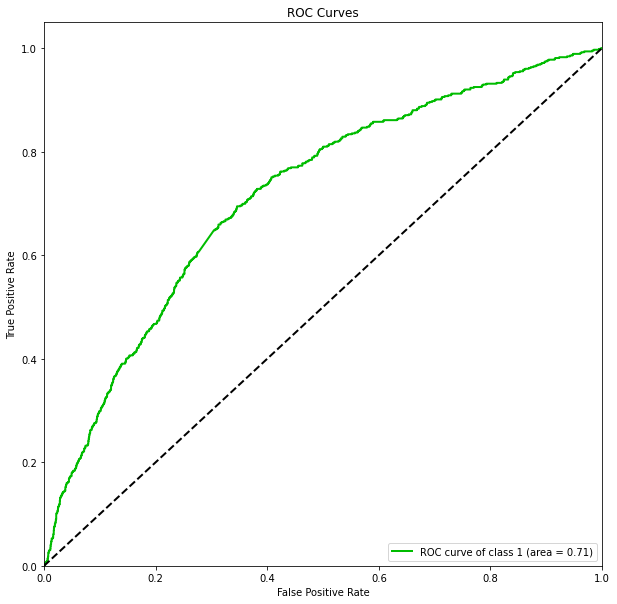

In [19]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_valid,probas , classes_to_plot= 1,plot_micro= False, plot_macro = False, figsize = (10,10))
plt.rcParams.update({'text.color': "blue",
                     'axes.labelcolor': "white"})

plt.show()